In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path= "/content/drive/My Drive/ACSS_attended.csv"
df=pd.read_csv(file_path, encoding='utf-8')
print(df.head)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of          First Name  Last Name  ACSS Signup via dashboard  Attended ACSS  \
0     Dimple Kumari      Gupta                          0              0   
1           Shreeya        K s                          0              1   
2              Riya     Bhalla                          0              1   
3             Rahul      dagar                          0              0   
4            Aaryan     Marcha                          0              1   
...             ...        ...                        ...            ...   
1727        Pradnya          K                          0              1   
1728          AARYA     MISHRA                          0              1   
1729        Muskaan   Karakoti                          0              1   
1730       Prachiti  Malvankar                          0              0   
1731 

In [ ]:
df.columns

Index(['First Name', 'Last Name', 'ACSS Signup via dashboard', 'Attended ACSS',
       'ACSS Slot', 'ACSS Attended Date', 'ACSS Type', 'Call Complete',
       'Likelihood of attending AC', 'Call Date and Time', 'Mobile Phone',
       'AC Result', 'AC Date Time'],
      dtype='object')

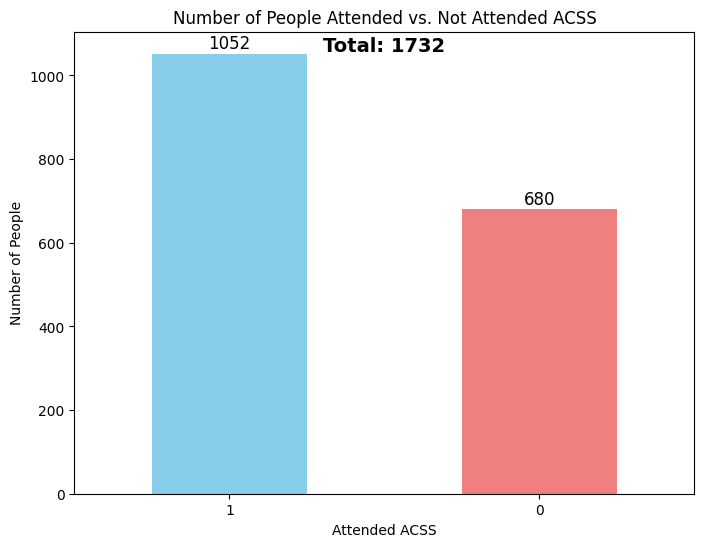

In [ ]:
import matplotlib.pyplot as plt

# Count the number of people who attended and didn't attend ACSS
attended_count = df['Attended ACSS'].value_counts()

# Calculate total count
total_count = attended_count.sum()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = attended_count.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Number of People Attended vs. Not Attended ACSS')
plt.xlabel('Attended ACSS')
plt.ylabel('Number of People')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add labels above each bar
for i, count in enumerate(attended_count):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

# Add total count inside the plot, positioned slightly above the highest bar
max_count = max(attended_count)
plt.text(0.5, max_count + 5, f"Total: {total_count}", ha='center', fontsize=14, fontweight='bold', color='black')

plt.show()

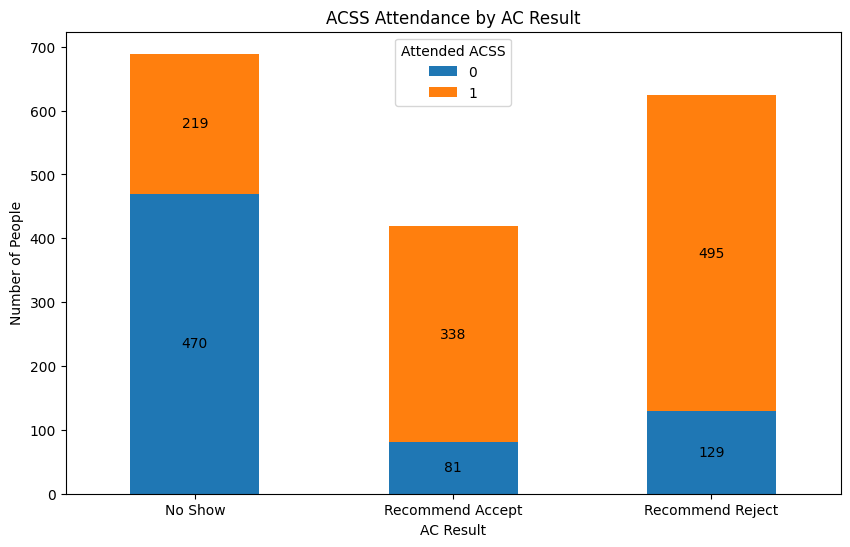

Attended ACSS,0,1
AC Result,,
No Show,470,219
Recommend Accept,81,338
Recommend Reject,129,495


In [ ]:
# number of people who attended ACSS out of ac result as recommend accept, recommend reject, no show

# Group by 'AC Result' and 'Attended ACSS' and count occurrences
acss_attendance = df.groupby(['AC Result', 'Attended ACSS']).size().unstack(fill_value=0)

# Plotting
acss_attendance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('ACSS Attendance by AC Result')
plt.xlabel('AC Result')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Attended ACSS')

# Annotate bars with counts
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.show()

# Print the table
acss_attendance


In [ ]:
#acceptance rate
# Data
attended = {"No Show": 219, "Recommend Accept": 338, "Recommend Reject": 495}
not_attended = {"No Show": 470, "Recommend Accept": 81, "Recommend Reject": 129}

# Compute acceptance rates
acceptance_rate_attended = attended["Recommend Accept"] / sum(attended.values()) * 100
acceptance_rate_not_attended = not_attended["Recommend Accept"] / sum(not_attended.values()) * 100

print(f"Acceptance Rate for Those Who Attended ACSS: {acceptance_rate_attended:.2f}%")
print(f"Acceptance Rate for Those Who Did Not Attend ACSS: {acceptance_rate_not_attended:.2f}%")


Acceptance Rate for Those Who Attended ACSS: 32.13%
Acceptance Rate for Those Who Did Not Attend ACSS: 11.91%


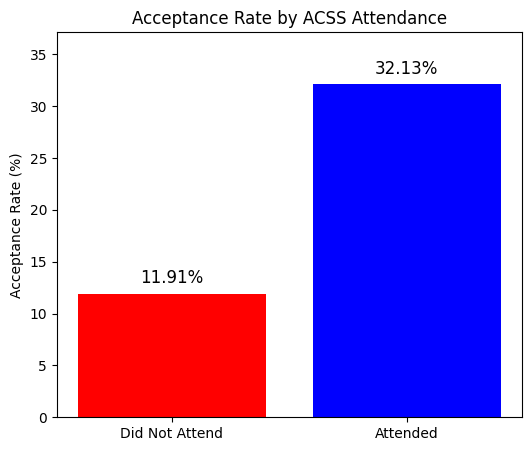

In [ ]:
import matplotlib.pyplot as plt

# Data for plot
categories = ["Did Not Attend", "Attended"]
acceptance_rates = [acceptance_rate_not_attended, acceptance_rate_attended]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(categories, acceptance_rates, color=["red", "blue"])
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rate by ACSS Attendance")
plt.ylim(0, max(acceptance_rates) + 5)

# Add labels
for i, rate in enumerate(acceptance_rates):
    plt.text(i, rate + 1, f"{rate:.2f}%", ha='center', fontsize=12)

plt.show()


In [ ]:
#Chi-Square Statistic
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = [
    [not_attended["Recommend Accept"], attended["Recommend Accept"]],  # Accepted
    [not_attended["Recommend Reject"], attended["Recommend Reject"]],
    [not_attended["No Show"], attended["No Show"]]# Rejected
]

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant. Attending ACSS likely affects acceptance chances.")
else:
    print("The difference is NOT statistically significant. ACSS attendance may not impact acceptance significantly.")

#the value of p gives:
# If p-value < 0.05, it means the difference in acceptance rates is not random—attending ACSS likely increases acceptance chances.
#If p-value ≥ 0.05, it means no strong evidence that ACSS affects acceptance.

Chi-Square Statistic: 402.41
P-Value: 0.0000
The difference is statistically significant. Attending ACSS likely affects acceptance chances.


In [ ]:
# Compute odds of acceptance for both groups
odds_attended = attended["Recommend Accept"] / attended["Recommend Reject"]
odds_not_attended = not_attended["Recommend Accept"] / not_attended["Recommend Reject"]

# Compute odds ratio
odds_ratio = odds_attended / odds_not_attended
print(f"Odds Ratio: {odds_ratio:.2f}")

# Interpretation
if odds_ratio > 1:
    print("Attending ACSS increases the odds of acceptance.")
else:
    print("Attending ACSS does not increase the odds of acceptance.")


#If odds ratio > 1, attending ACSS improves acceptance chances.
#If odds ratio < 1, attending ACSS decreases acceptance chances.


Odds Ratio: 1.09
Attending ACSS increases the odds of acceptance.


In [ ]:
# Prior probabilities
p_attend = sum(attended.values()) / (sum(attended.values()) + sum(not_attended.values()))  # P(Attended)
p_accept_given_attend = attended["Recommend Accept"] / sum(attended.values())  # P(Accept | Attended)
p_accept_given_not_attend = not_attended["Recommend Accept"] / sum(not_attended.values())  # P(Accept | Not Attended)

# Compute posterior probability of being accepted given attendance
p_accept = (p_accept_given_attend * p_attend) + (p_accept_given_not_attend * (1 - p_attend))

# Compute the probability ratio
posterior_ratio = p_accept_given_attend / p_accept_given_not_attend

print(f"Posterior Probability of Acceptance Given Attendance: {posterior_ratio:.2f}")

# Interpretation
if posterior_ratio > 1:
    print("Attending ACSS increases the probability of being accepted.")
else:
    print("Attending ACSS does not significantly impact acceptance probability.")

# If posterior ratio > 1, ACSS increases acceptance probability.
#If posterior ratio ≈ 1, ACSS has no strong effect.


Posterior Probability of Acceptance Given Attendance: 2.70
Attending ACSS increases the probability of being accepted.
